## run image recognition using mxnet with the resnet the full resnet-152 model.

This notbook runs the trained mxnet against a series of 20 images.   You can replace these urls and use urls for other images.

MXNet is contained in a docker container and you must start that first from your command line as follows.

$docker run -it -p 8050:8050 dbgannon/mxnet

this will load the model.  ignore the lib1394 error.  It will take a minute or so to load.   when it says "Hit Ctrl-C to quit" you are ready to run the steps below.

In [15]:
#if you don't have opencv-installed uncomment this statement.
!pip install opencv-python

    100% |████████████████████████████████| 43.8MB 15kB/s 


In [1]:
import sys
import time
import socket
import requests
import json
import cv2
import numpy as np
from socket import gethostname
hostnm = gethostname()
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import base64



The urls below were used in the benchmarks.   you can replace them with other jpeg image links.

In [2]:
url1 = 'http://3.bp.blogspot.com/-K6UvSpMGZTU/T_V93JfmsGI/AAAAAAAAD58/rIAG54k7Qe8/s1600/Borzoi+dog+wallpapers+6.jpg'
url2 = 'http://www.vetbook.org/wiki/dog/images/thumb/5/5c/Lowchen.jpg/694px-Lowchen.jpg'
url3 = 'https://cdn.pixabay.com/photo/2016/10/15/12/01/dog-1742295_960_720.jpg'
url4 = 'https://www.danmurphys.com.au/media/DM/Product/750x2000/379034_0_9999_v1_m56577569837963866.jpg'
url5 = 'https://img-new.cgtrader.com/items/20608/heineken_beer_bottle_3d_model_fbx_lwo_lw_lws_obj_max_lxo_79aea18d-613b-46ab-b323-2bc0c3a740dc.jpg'
url6 = 'https://upload.wikimedia.org/wikipedia/commons/thumb/1/16/Official_Portrait_of_President_Reagan_1981.jpg/1200px-Official_Portrait_of_President_Reagan_1981.jpg'
url7 = 'http://3.bp.blogspot.com/-wRi2GBtO-Yk/T3cYy2VIgRI/AAAAAAAAB-8/Z9X6Jjc1P34/s1600/great-blue-heron.jpg'
url8 = 'http://assets.nydailynews.com/polopoly_fs/1.2773122.1472670685!/img/httpImage/image.jpg_gen/derivatives/article_750/nydn-2016-chevrolet-corvette-stingray-arctic-white-front-quarter-3.jpg'
url9 = 'http://i1.ytimg.com/vi/UxUBDJlsnjI/maxresdefault.jpg'
url10= "https://abagond.files.wordpress.com/2013/10/george_washington_-_gilbert_stuart.jpg"
url11 = "http://netdna.webdesignerdepot.com/uploads/2009/01/macintosh_classic.jpg"
url12 = "https://vg1x53s8njd7s2qzk0jig13y-wpengine.netdna-ssl.com/wp-content/uploads/2016/08/Woman-Looking-at-Cellphone.jpg"
url13 = "https://i.pinimg.com/736x/0f/77/a9/0f77a9b3eb68bed28ee8649bae19eb84.jpg"
url14 = "https://d.ibtimes.co.uk/en/full/1571929/donald-trump.jpg"
url15 = "http://cdn.static-economist.com/sites/default/files/images/2016/02/blogs/game-theory/20160213_usp503.jpg"
url16 = "http://www.myhousecallmd.com/wp-content/uploads/2010/07/21_cover_image_small_BigBeachVolleyball.jpg"
url17 = "http://images4.fanpop.com/image/photos/17700000/Cup-of-coffee-coffee-17731301-1680-1050.jpg"
url18 = "https://images1.browardpalmbeach.com/imager/expert-says-chinese-drywall-comes-with-fun/u/745xauto/6447598/bacteria1.jpg"
url19 = "http://www.freakingnews.com/images/app_images/mushroom.jpg"
url20 = "http://themushroomforager.com/wp-content/uploads/2012/03/IMG_6039.1.jpg"
urls =  {"url1": url1, "url2": url2,"url3": url3,"url4": url4,"url5": url5,"url6": url6,"url7": url7,"url8": url8,
          "url11": url11, "url12": url12,"url13": url13,"url14": url14,"url15": url15,"url16": url16,"url17": url17,
         "url18": url18,"url9": url9,"url10": url10,"url19": url19,"url20": url20}


In [15]:

def download(url,prefix=''):
    filename = prefix+url.split("/")[-1]
    filename = filename.replace("+",'',10)
    urllib.urlretrieve(url, prefix+filename)
    return prefix+filename

In [11]:
import urllib
def get_image(file, show=True):
    filename = url.split("/")[-1]
    img = cv2.imread(file)
    return img

### setting up your local copy of the images
it is important that you create a tmp directory somehwere and modify the "prefix" parameter below to point to it.

In [16]:
urllist = urls.keys()
filenames = []
for x in urllist:
    url = urls[x]
    filenames.append(download(url, prefix="c:/Users/dennis/tmp/"))

In [6]:
def sendrest0(filepath):
    addr = "http://"+"localhost"+":"+"8050"+"/call_predict"
    failed = True
    maxtries = 0
    while (failed == True and maxtries < 5):
        try:
            #print('files = ',str(files))
            total = 0.0
            for i in range(1):
                files = {'file': open(filepath, 'rb')}
                t0 = time.time()
                r = requests.post(addr, files=files)
                t1 = time.time()
                total += t1-t0
            print("time for remote call = "+str(total))
            print(r.text)
            failed = False
        except:
            print('post error')
            maxtries = maxtries +1
            time.sleep(0.2)
            if (maxtries == 5):
                 return False
    #print "got reply:"+r.content
    return 
    

In [8]:

def sendrest(filename):
    try:
        addr = "http://"+"localhost"+":"+"8050"+"/call_predict"
        #addr = "http://51.143.96.95:8050/call_predict"
        #addr = "http://10.0.0.6:8050/call_predict"
        img = get_image(filename, show=False)
        plt.imshow(img)
        #img_str = cv2.imencode('.jpg', img)[1].tostring()
        #img_str = str(img_str)
        #nparr = np.fromstring(img_str, np.uint8)
        #cv2.CV_LOAD_IMAGE_COLOR = 1 # set flag to 1 to give colour image
        #img = cv2.imdecode(nparr, cv2.CV_LOAD_IMAGE_COLOR)
        
        #dic = { 'URL': url, 'image': img_str }
        #st = json.dumps(dic)
        #payload = {'string':st}
        #print 'sending :'+ str(payload)[:80]
        failed = True
        maxtries = 0
        while (failed == True and maxtries < 5):
            try:
                #print('files = ',str(files))
                total = 0.0
                for i in range(1):
                    files = {'file': open(filename, 'rb')}
                    #t0 = time.time()
                    r = requests.post(addr, files=files)
                    #t1 = time.time()
                    #total += t1-t0
                #print("time for remote call = "+str(total/10))
                print(r.text)
                failed = False
            except:
                print('post error')
                maxtries = maxtries +1
                time.sleep(0.2)
                if (maxtries == 5):
                     return False
        #print "got reply:"+r.content
        return 
    except:
        #print "error in sendrest"
        return "bad url"


In [17]:
filenames[0]

'c:/Users/dennis/tmp/20160213_usp503.jpg'

i think this is a  bitter or it may be a  hard cider, but i am not sure about this.get-save-read-time=0.006486177444458008 total-call-time=1.587137222290039


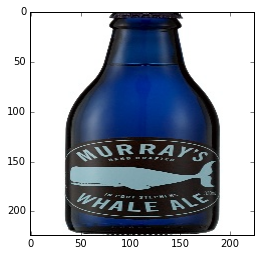

In [20]:
sendrest(filenames[12])

In [22]:
total = 0.0
for i in range(1,20):
    t0 = time.time()
    url= "url"+str(i)
    sendrest0(filenames[i])
    t1 = time.time()
    total = total+t1-t0
    print(i)
print("average call = "+str(total/20.0))

time for remote call = 1.58200001717
i think this is a  politician or it may be a  politician, politico, pol, political leader, but i am not sure about this.get-save-read-time=0.004248380661010742 total-call-time=1.573080062866211
1
time for remote call = 1.76399993896
i think this is a  espresso or it may be a  coffee, java, but i am not sure about this.get-save-read-time=0.0031969547271728516 total-call-time=1.7514824867248535
2
time for remote call = 1.58200001717
This certainly looks like  a  volleyball net.get-save-read-time=0.007290840148925781 total-call-time=1.5708110332489014
3
time for remote call = 1.57299995422
i think this is a  personal computer, PC, microcomputer or it may be a  desktop computer, but i am not sure about this.get-save-read-time=0.0023109912872314453 total-call-time=1.5619277954101562
4
time for remote call = 1.58999991417
i think this is a  bow tie, bow-tie, bowtie or it may be a  waxwork, wax figure, but i am not sure about this.get-save-read-time=0.0026

### for the local mac call the time is  = 1.40344760418 averaged over 10 calls.

for the remote call to azure the time = = 3.09608461857  averaged.  

In [16]:
!sudo pip install algorithmia

sudo: pip: command not found


In [36]:
import Algorithmia

input = url13
client = Algorithmia.client('simboDpCMa4mA1GrC3MW95c/SKL1')
algo = client.algo('deeplearning/InceptionNet/1.0.4')
t0 = time.time()
print(algo.pipe(input))
t1 = time.time()
print("time ="+str(t1-t0))

AlgoResponse(result={u'tags': [{u'confidence': 0.3079069256782532, u'class': u'bicycle-built-for-two, tandem bicycle, tandem'}, {u'confidence': 0.19805926084518433, u'class': u'tricycle, trike, velocipede'}, {u'confidence': 0.03377104923129082, u'class': u'suit, suit of clothes'}, {u'confidence': 0.03294160217046738, u'class': u'mountain bike, all-terrain bike, off-roader'}, {u'confidence': 0.026788128539919853, u'class': u'jinrikisha, ricksha, rickshaw'}]},metadata=Metadata(content_type='json',duration=2.47857864,stdout=None))
time =2.87857794762


## time for algorithmia vs local on azure
<pre>
       local azure   algorithmia  remote bigazure  bigazure far 
url5    2.47       2.11            2.39              2.15
url6    2.46       2.33            2.61              2.88
url7    2.44       2.11            1.80              2.51
url8    2.66       2.35            1.87              2.06
url9    2.40       2.06            1.85              2.04
url10   2.78       3.29            2.32              2.98
url11   2.44       2.22            2.02              2.11
url12   2.71       2.27            2.17              2.69
url13   2.45       2.87            1.97              2.32
url14   2.63       2.36            2.09              2.76
url15   2.50       3.35            1.84              2.34
url16   2.54       2.82            1.91              2.70
url17   2.53      13.09            2.02              2.46
url18   2.43       2.17            1.90              2.13
url19   2.50       2.59            2.18              2.60
url20   2.67       2.67            2.23              2.80

average for all 20 when local on mac 1.80
average for all 20 remote small azure 3.14
average for all 20 remote big   azure 2.85
average all 20 on new surface laptop 1.56 with local images 1.06

mac mini = corei5 2.6GH
win10 surf = corei7 2.5GH


</pre>